# Laboratorio 1 - soluciones computacionales

## INTEGRANTES:
- Kenny Dong Jie Zhu Ye
- Samir David Mercado Blanco

In [161]:
from IPython.display import display, Math
import sympy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

## PUNTO 1

Escriba un polinomio $p(x)$ tal que $|sinc(x) − p(x)| ≤ 10^{-10}$ para $−0.2 ≤ x ≤ 0.2$, donde:
$$
f(x)= \left\{ \begin{array}{lcc}
             \frac{sin(x)}x &   si  &  x\neq 0 \\
             \\ 1 &  si  & x =  0
             \end{array}
   \right.
$$
es la función "$sinc$" (usada en procesamiento de señales, etc). Muestre ademas que su polinomio p cumple la condición: $|sinc(x) − p(x)| ≤ 10^-10$ para $x ∈ [−0.2, 0.2]$, grafique los errores teoricos y reales.

In [162]:
x = sp.symbols("x")  # creamos la variable x
sinc = sp.Piecewise((1, x==0), (sp.sin(x)/x, x!=0))  # asignamos la funcion

x0 = 0   # punto de expansion
n = 6    # orden de polinomio

In [163]:
p = sp.series(expr = sinc, x=x , x0=x0, n=n)   # genera la serie de taylor
display(Math(sp.latex(p)))   # muestra la serie en formato latex

<IPython.core.display.Math object>

In [164]:
max_n = 10   # seria el max grado   
p = [sp.series(expr=sinc, x=x, x0=x0, n=ni).removeO() for ni in range(2,max_n)]   # el grado es 6 porque inicializa en 2 hasta 8

### Cota del error

$|f(0.18)-P_n(0.18)| = \frac{(f)^{n+1}*0.18^{n+1}}{(n+1)!}\leq \frac{0.18^{n+1}}{(n+1)!}$

Para $c\in[0,0.18]$ , $f(x)=senc(x)$ , $x_{0}=0$ , $x=0.18$ , $S=10^{-10}$

In [165]:
n_pol = len(p)   # tamaño del polinomio a utilizar
pol_deg = np.arange(1,n_pol+1)  # cea una lista hasta el polinomio a utilizar
print(pol_deg)

error_teoric = [((0.1)**(n+1))/(mt.factorial(n+1)) for n in pol_deg]   # error estimado con lagrange, esa ecuacion siempre es mayor al lagrange


f_eval = sinc.subs(x,0.1).evalf() # intercambia valores de x en la funcion
error_experiment = [np.abs(float(f_eval - p_n.subs(x, 0.1).evalf())) for p_n in p] # se crea p_n en la cual se itera a travez de la lista de polinomio


found_n = False  # se inicializa una variable boobleana
for i in range(len(error_experiment)):
  if error_experiment[i] <= 10**-10:  # se busca resultado <= 10^-10
    print(f"el polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: \npolinomio de orden n = {i+1}")
    found_n = True   # si encuentra seria True
    break  
if not found_n:  # seria False si no lo encuentra
  print("no hay polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2, escriba mas polinomios")
    

print("\nvalores estimados o teoricos: ")
for i in range(len(pol_deg)):
  print(f"n = {pol_deg[i]} es: {error_teoric[i]}")

print("\nvalores reales o experimentales: ")
for i in range(len(pol_deg)):
  print(f"n = {pol_deg[i]} es: {error_experiment[i]}")

print(f"\npodemos ver que cuando n = 6 el valor es: {error_experiment[5]} ≤ 10^-10 ")

[1 2 3 4 5 6 7 8]
el polinomio p(x) tal que |sinc(x) − p(x)| ≤ 10^-10 para −0.2 ≤ x ≤ 0.2 es: 
polinomio de orden n = 6

valores estimados o teoricos: 
n = 1 es: 0.005000000000000001
n = 2 es: 0.00016666666666666672
n = 3 es: 4.166666666666668e-06
n = 4 es: 8.333333333333335e-08
n = 5 es: 1.3888888888888894e-09
n = 6 es: 1.984126984126985e-11
n = 7 es: 2.4801587301587314e-13
n = 8 es: 2.7557319223985903e-15

valores reales o experimentales: 
n = 1 es: 0.0016658335317184525
n = 2 es: 8.331349482526562e-07
n = 3 es: 8.331349482526562e-07
n = 4 es: 1.9838508613645445e-10
n = 5 es: 1.9838508613645445e-10
n = 6 es: 2.7644553313166398e-14
n = 7 es: 2.7644553313166398e-14
n = 8 es: 1.1102230246251565e-16

podemos ver que cuando n = 6 el valor es: 2.7644553313166398e-14 ≤ 10^-10 


#### Graficas

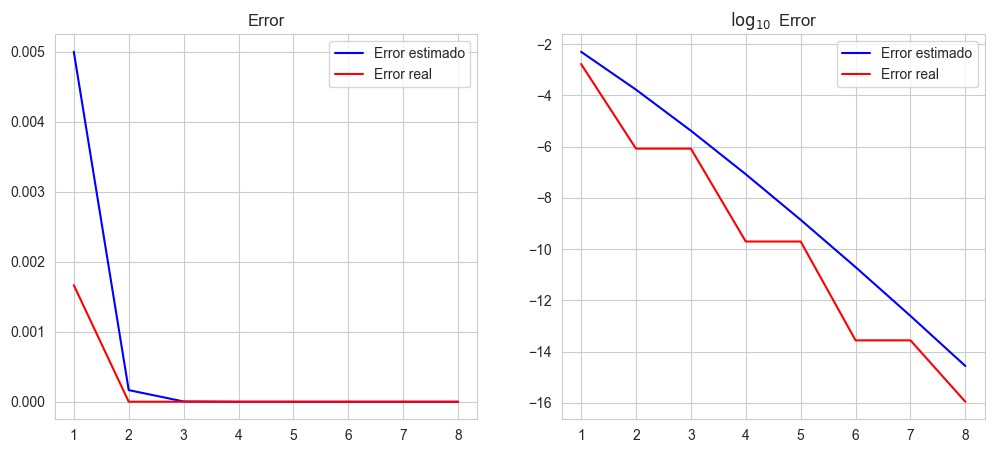

In [166]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(pol_deg,error_teoric,color='b')
ax1.plot(pol_deg,error_experiment, color ='r')
ax1.set_title('Error')
ax1.legend(['Error estimado', 'Error real'], prop={'size':10})

ax2.plot(pol_deg,np.log10(error_teoric),color='b')
ax2.plot(pol_deg,np.log10(error_experiment), color = 'r')
ax2.set_title('$\log_{10}$ Error')
ax2.legend(['Error estimado', 'Error real'], prop={'size':10});

# PUNTO 2
Halle las fórmulas de diferencias progresivas, regresivas y centrales para cualquier $f ∈ C4[a, b]$ tal que para $x_{0} ∈ (a,b)$ se tenga $O(h^3$). Luego, considere $f(x) = xln(x)$ y calcule $f′(1)$ para distintos valores de $h$, grafique los errores e indique qué valor de $h$ minimiza el error.

Por Taylor, nuestra función debe ser derivable hasta orden 4:

$f(x)=f(x_0)+f^{'}(x_0)(x-x_0)+f^{''}(x)\frac{(x-x_0)^{2}}{2!}+f^{'''}(x)\frac{(x-x_0)^{3}}{3!}+f^{''''}(c)\frac{(x-x_0)^{4}}{4!}$

Hallemos las formulas de diferencias progresivas y regresivas:

#### diferencia progresiva:
sea $x =x_0 + 2h$

$f(x_0+2h)=f(x_0)+2f^{'}(x_0)h+4f^{''}(x_0)\frac{h^{2}}{2!}+8f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$    $(Eq1)$

sea $x =x_0 + 3h$

$f(x_0+3h)=f(x_0)+3f^{'}(x_0)h+9f^{''}(x_0)\frac{h^{2}}{2!}+27f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq2)$

sea $x =x_0 + 4h$

$f(x_0+4h)=f(x_0)+4f^{'}(x_0)h+16f^{''}(x_0)\frac{h^{2}}{2!}+64f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq3)$

- $(Eq2 - \frac{9}{4}Eq1)$

$f(x_0+3h) - \frac{9}{4}f(x_0+2h)=-\frac{5}{4}f(x_0)-\frac{3}{2}f^{'}(x_0)h+9f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq4)$

- $(Eq3 - \frac{16}{9}Eq2)$

$f(x_0+4h) - \frac{16}{9}f(x_0+3h)=-\frac{7}{9}f(x_0)-\frac{4}{3}f^{'}(x_0)h+16f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq5)$

- $(Eq5 - \frac{16}{9}Eq4)$

$f(x_0+4h) - \frac{32}{9}f(x_0+3h) + 4f(x_0-2h) = \frac{13}{9}f(x_0) + \frac{4}{3}hf^{'}(x_0) + Oh^4$

entonces:

$f^{'}(x_0) = \frac{3f(x_0+4h)-\frac{32}{3}f(x_0+3h)+12f(x_0+2h)-\frac{13}{3}f(x_0)}{4h}+Oh^3$   

#### diferencia regresiva:

sea $x =x_0 - 2h$

$f(x_0-2h)=f(x_0)-2f^{'}(x_0)h+4f^{''}(x_0)\frac{h^{2}}{2!}-8f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$    $(Eq1)$

sea $x =x_0 - 3h$

$f(x_0-3h)=f(x_0)-3f^{'}(x_0)h+9f^{''}(x_0)\frac{h^{2}}{2!}-27f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq2)$

sea $x =x_0 - 4h$

$f(x_0-4h)=f(x_0)-4f^{'}(x_0)h+16f^{''}(x_0)\frac{h^{2}}{2!}-64f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq3)$

- $(Eq2 - \frac{9}{4}Eq1)$

$f(x_0-3h) - \frac{9}{4}f(x_0-2h)=-\frac{5}{4}f(x_0)+\frac{3}{2}f^{'}(x_0)h-9f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq4)$

- $(Eq3 - \frac{16}{9}Eq2)$

$f(x_0-4h) - \frac{16}{9}f(x_0-3h)=-\frac{7}{9}f(x_0)+\frac{4}{3}f^{'}(x_0)h-16f^{'''}(x_0)\frac{h^{3}}{3!}+Oh^{4}$   $(Eq5)$

- $(Eq5 - \frac{16}{9}Eq4)$

$f(x_0-4h) - \frac{32}{9}f(x_0-3h) + 4f(x_0-2h) = \frac{13}{9}f(x_0) - \frac{4}{3}hf^{'}(x_0) + Oh^4$

entonces:

$f^{'}(x_0) = \frac{-3f(x_0-4h)+\frac{32}{3}f(x_0-3h)-12f(x_0-2h)+\frac{13}{3}f(x_0)}{4h}+Oh^3$   

#### Función dada:

In [167]:
x = sp.Symbol('x')
f = x * sp.ln(x)    

#### Aproximaciones progresivas y regresivas

In [168]:
x0 = 1  
h_values = [i for i in range(-10,0)]
h_pot = [10**i for i in range(-10,0)]
print(f"Valores de h: \n {h_pot}")

# elevamos 10^h para que los valores sea cercanos a cero
aprox_prog = [float(((3*f.subs(x, x0+4*h) - (32/3)*f.subs(x, x0 + 3*h) + 
                12*f.subs(x, x0+2*h) - (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot]  # formula progreiva

aprox_reg = [float(((-3*f.subs(x, x0-4*h) + (32/3)*f.subs(x, x0 - 3*h) 
                - 12*f.subs(x, x0-2*h) + (13/3)*f.subs(x, x0)) / (4*h)).evalf()) for h in h_pot] # formula regresiva


print("aroximaciones progresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->   aproximacion: {aprox_prog[i]}")

print("\naproximaciones regresivas: ")
for i in range(len(h_pot)):
    print(f"h = {h_pot[i]}  ----->    aproximacion: {aprox_reg[i]}")

Valores de h: 
 [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]
aroximaciones progresivas: 
h = 1e-10  ----->   aproximacion: 1.0000000827403719
h = 1e-09  ----->   aproximacion: 0.9999998421920492
h = 1e-08  ----->   aproximacion: 1.0000000179773614
h = 1e-07  ----->   aproximacion: 0.9999999981783847
h = 1e-06  ----->   aproximacion: 1.0000000001582823
h = 1e-05  ----->   aproximacion: 0.9999999999824994
h = 0.0001  ----->   aproximacion: 1.0000000000018892
h = 0.001  ----->   aproximacion: 1.0000000019895414
h = 0.01  ----->   aproximacion: 1.0000018962427373
h = 0.1  ----->   aproximacion: 1.0012400275654099

aproximaciones regresivas: 
h = 1e-10  ----->    aproximacion: 1.0000000827403699
h = 1e-09  ----->    aproximacion: 1.0000000919922305
h = 1e-08  ----->    aproximacion: 0.9999999846706713
h = 1e-07  ----->    aproximacion: 1.0000000015090518
h = 1e-06  ----->    aproximacion: 0.999999999908483
h = 1e-05  ----->    aproximacion: 1.000000000015802
h = 0.00

### errores

hallamos el error de las progresivas y regresivas con: 

$error = \frac{|valor_{real} - errores_{realtivos}|}{valor_{real}}$

In [169]:
f_diff = sp.diff(f, x)  # se deriva f
df_real = float(f_diff.subs(x, x0).evalf())   # valor real que seria la derivada de f evaluada en 1
print(f"la derivada de la funcion es {f_diff}\n el valor real o f'(1) es: {df_real}")

la derivada de la funcion es log(x) + 1
 el valor real o f'(1) es: 1.0


In [170]:
error_prog = [(np.abs(df_real-df_prog)/df_real) for df_prog in aprox_prog]   # lista de errores progresivas
print(f"errores progresivas: \n{error_prog}")

errores progresivas: 
[8.274037188726879e-08, 1.578079508179897e-07, 1.7977361377319312e-08, 1.8216153030436999e-09, 1.5828227617475932e-10, 1.7500556559468805e-11, 1.8891554987021664e-12, 1.989541420499563e-09, 1.896242737275955e-06, 0.0012400275654098625]


In [171]:
error_reg = [(np.abs(df_real-df_reg)/df_real) for df_reg in aprox_reg]  # lista de errores regresivas
print(f"errores regresivas:\n{error_reg}")

errores regresivas:
[8.274036988886735e-08, 9.199223049982663e-08, 1.532932869530157e-08, 1.5090517724303254e-09, 9.15170161874812e-11, 1.5802026354094778e-11, 2.1116441928370477e-12, 2.0108411602492993e-09, 2.112568856516006e-06, 0.0037717483683460395]


#### graficas de errores

Text(0.5, 1.0, 'Error regresiva')

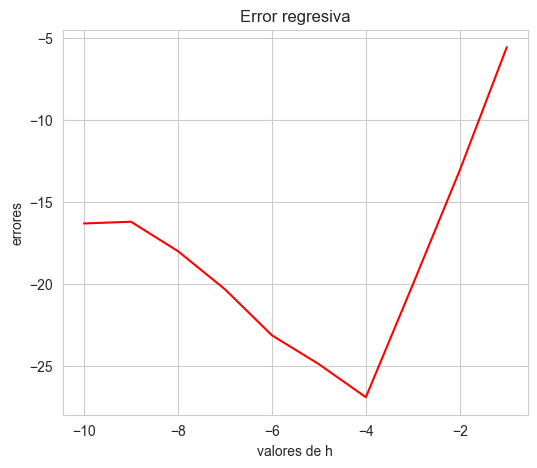

In [172]:
fig, ax1 = plt.subplots(figsize=(6,5))

ax1.plot(h_values,np.log(error_reg),color='r')
ax1.set_xlabel("valores de h")
ax1.set_ylabel("errores")
ax1.set_title('Error regresiva')

In [173]:
h_min_prog = h_pot[np.argmin([error_prog])]   # encuentra el valor de h correspondiente al error mínimo para las derivadas progresivas
h_min_reg = h_pot[np.argmin([error_reg])]    # encuentra el valor de h correspondiente al error mínimo para las derivadas regresivas
error_min_prog = error_prog[h_pot.index(h_min_prog)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas progresivas
error_min_reg = error_reg[h_pot.index(h_min_reg)]    # encuentra el error mínimo correspondiente al valor de h mínimo para las derivadas regresivas

print(f"h donde el error es mínimo (progresivas): {h_min_prog}, Error mínimo: {error_min_prog}")
print(f"h donde el error es mínimo (regresivas): {h_min_reg}, Error mínimo: {error_min_reg}")

h donde el error es mínimo (progresivas): 0.0001, Error mínimo: 1.8891554987021664e-12
h donde el error es mínimo (regresivas): 0.0001, Error mínimo: 2.1116441928370477e-12


# PUNTO 3
Considere la función: $f(x) = xsin(x)$ grafique en un solo lienzo a $f$ y los polinomios de Taylor
de grado $n = 1,2,...,6$ para: $x_0∈(−5π,5π)$.

In [174]:
x = sp.symbols("x")  # declaramos una variable
x_sinx = x*sp.sin(x)   # definimos la función

x0 = 0
n = 6

In [175]:
p = sp.series(expr= x_sinx, x=x, x0=x0, n=n)  # genera la serie de taylor de f
display(Math(sp.latex(p)))

<IPython.core.display.Math object>

In [176]:
max_n = 10
p = [sp.series(expr = x_sinx, x0=x0, n=n).removeO() for n in range(4,max_n)]  
p_latex = [sp.latex(pol) for pol in p]
distLatex = [display(Math(q)) for q in p_latex]
n_pol = len(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [177]:
sns.set_style('whitegrid')
cmap = sns.color_palette('tab10', n_pol)

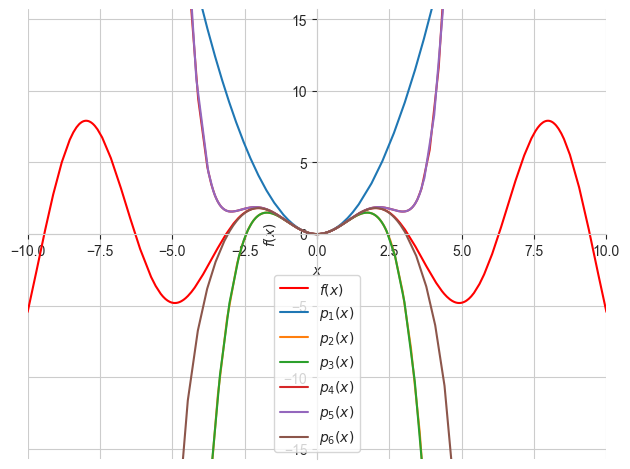

In [178]:
fig = pls.plot(x_sinx,xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color='r', show=False)
labs = ['$f(x)$']
for n in range(n_pol):
  c = cmap[n]
  labs.append(f'$p_{n+1}(x)$')
  fig.extend(pls.plot(p[n],xlim=[-10,10],ylim=[-5*np.pi,5*np.pi], line_color=c, show=False))
for n in range(n_pol+1): fig[n].label = labs[n]
fig.legend = True
fig.show()